In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import missingno

In [2]:
# Read the data
airlines = pd.read_csv("data/airlines.csv")
airports = pd.read_csv("data/airports.csv")
flights = pd.read_csv("data/flights.csv")

/tmp/ipykernel_19432/2685237934.py:4: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights = pd.read_csv("data/flights.csv")


#### Explore airlines table

In [3]:
print("The number of airlines is", airlines.shape[0])

The number of airlines is 14


In [4]:
print("Columns of the 'airlines' table: ", ', '.join(airlines.columns))

Columns of the 'airlines' table:  IATA_CODE, AIRLINE


In [5]:
airlines.head(2)

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.


In [6]:
print("The number of duplicated rows in 'airlines' table is", sum(airlines.duplicated()))

The number of duplicated rows in 'airlines' table is 0


In [7]:
# Missing values
airlines.isnull().sum()

IATA_CODE    0
AIRLINE      0
dtype: int64

#### Explore airports table

In [14]:
airports.head(2)

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.4404
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.6819


In [9]:
print("The number of airports is", airports.shape[0])

The number of airports is 322


In [10]:
airports.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     3
LONGITUDE    3
dtype: int64

In [11]:
print("There are", airports["AIRPORT"].duplicated().sum(), "airports with the same name.")

There are 0 airports with the same name.


#### Explore flights table

In [12]:
flights.head(2)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
flights.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [16]:
rows, columns = flights.shape
print(f"There are {rows} rows, and {columns} columns.")

There are 5819079 rows, and 31 columns.


In [17]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [18]:
#The number of missing values per column
print(flights.isnull().sum())

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64


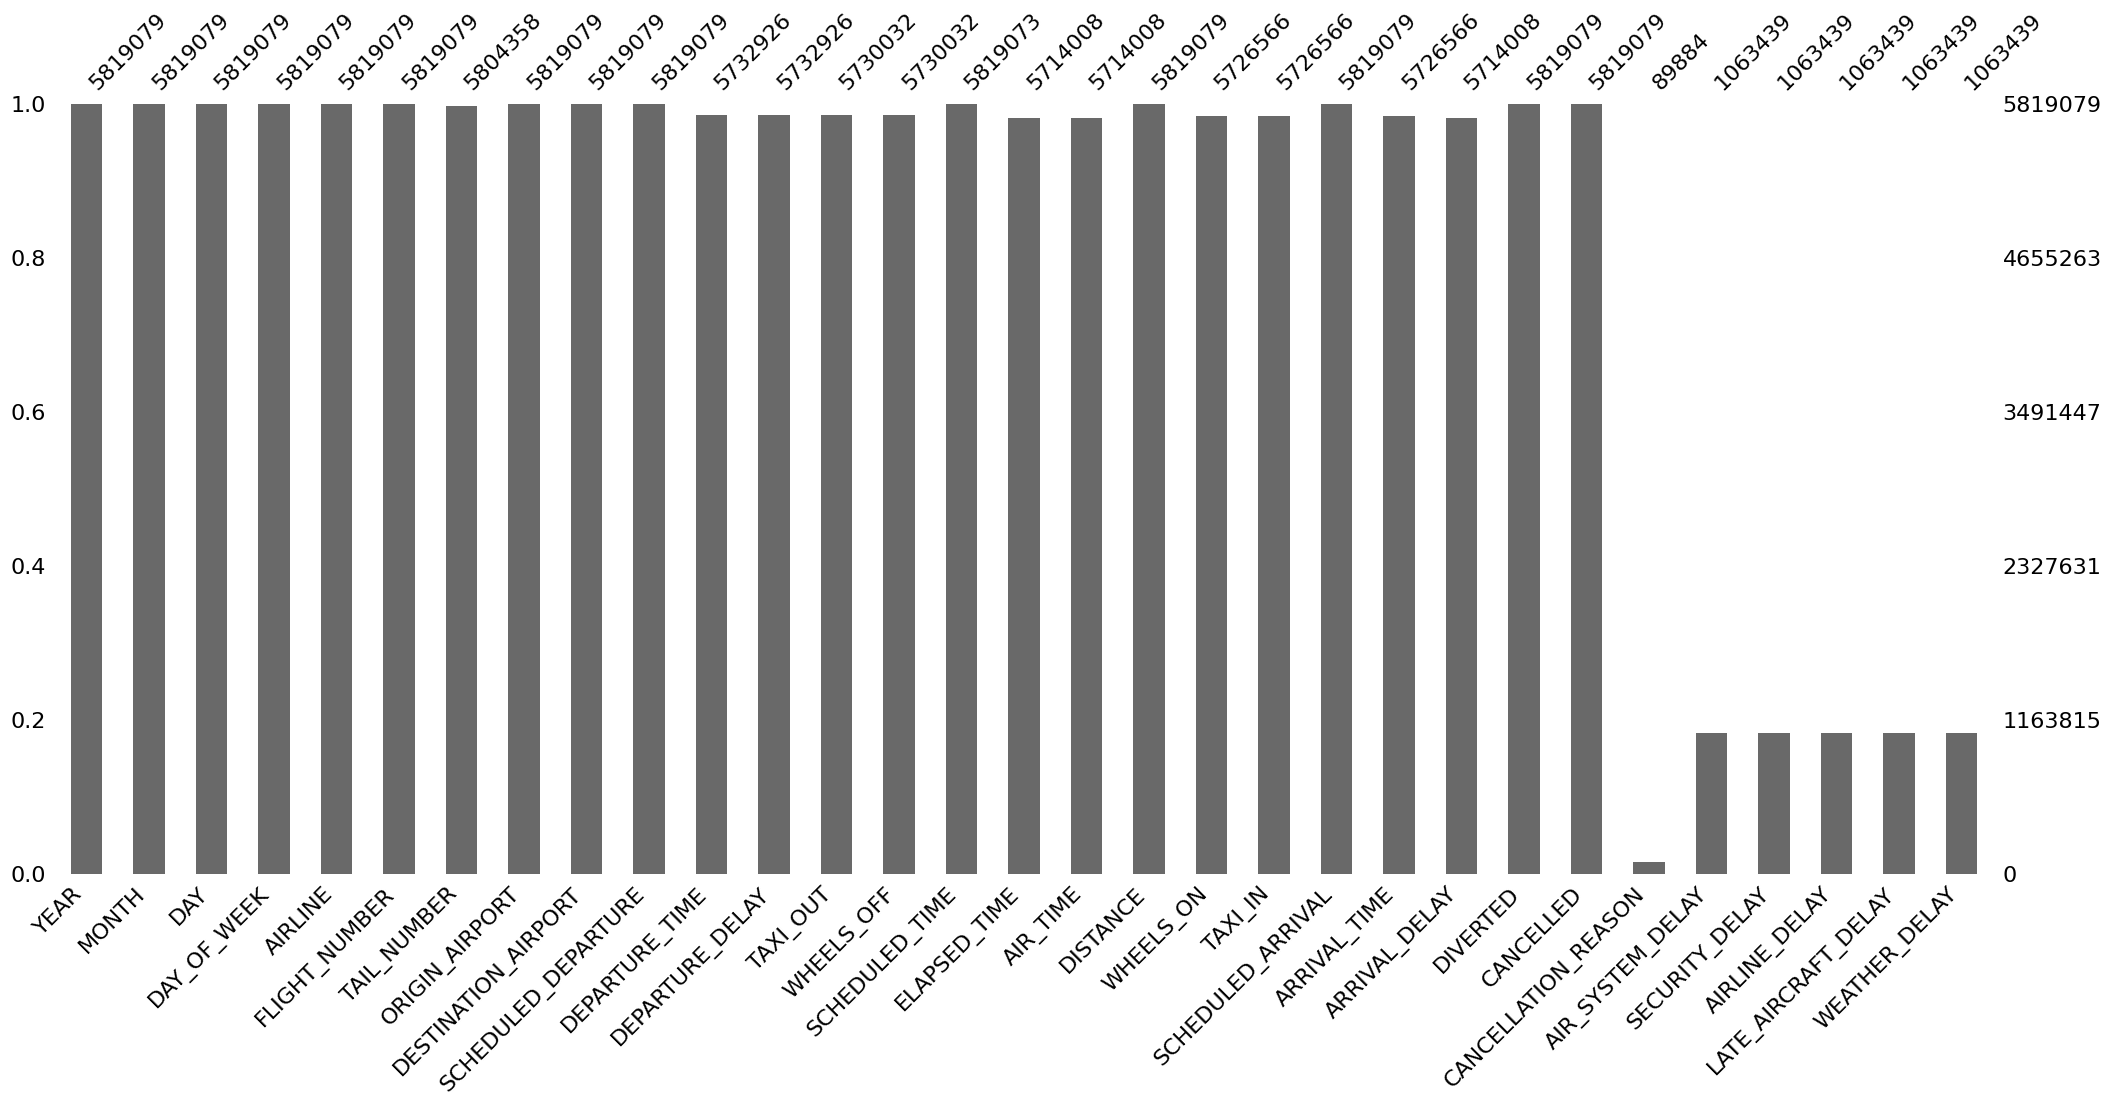

In [19]:
missingno.bar(flights)
plt.show()

In [20]:
print(f"Number of duplicate rows: {flights.duplicated().sum()}")

Number of duplicate rows: 0


In [21]:
#Duplicates per column
{x:airports[x].duplicated().sum() for x in airports}

{'IATA_CODE': 0,
 'AIRPORT': 0,
 'CITY': 14,
 'STATE': 268,
 'COUNTRY': 321,
 'LATITUDE': 2,
 'LONGITUDE': 2}

In [22]:
n_cancelled = (flights["CANCELLED"] == 1).sum()
print("The number of cancelled flights is", n_cancelled)

The number of cancelled flights is 89884


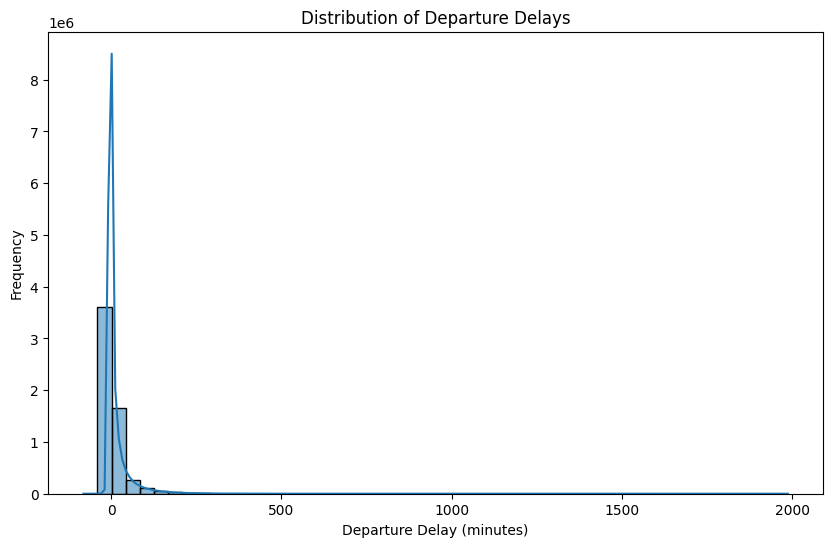

In [23]:
# The distribution of departure delays
plt.figure(figsize=(10, 6))
sns.histplot(flights['DEPARTURE_DELAY'].dropna(), bins=50, kde=True)
plt.title('Distribution of Departure Delays')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Frequency')
plt.show()

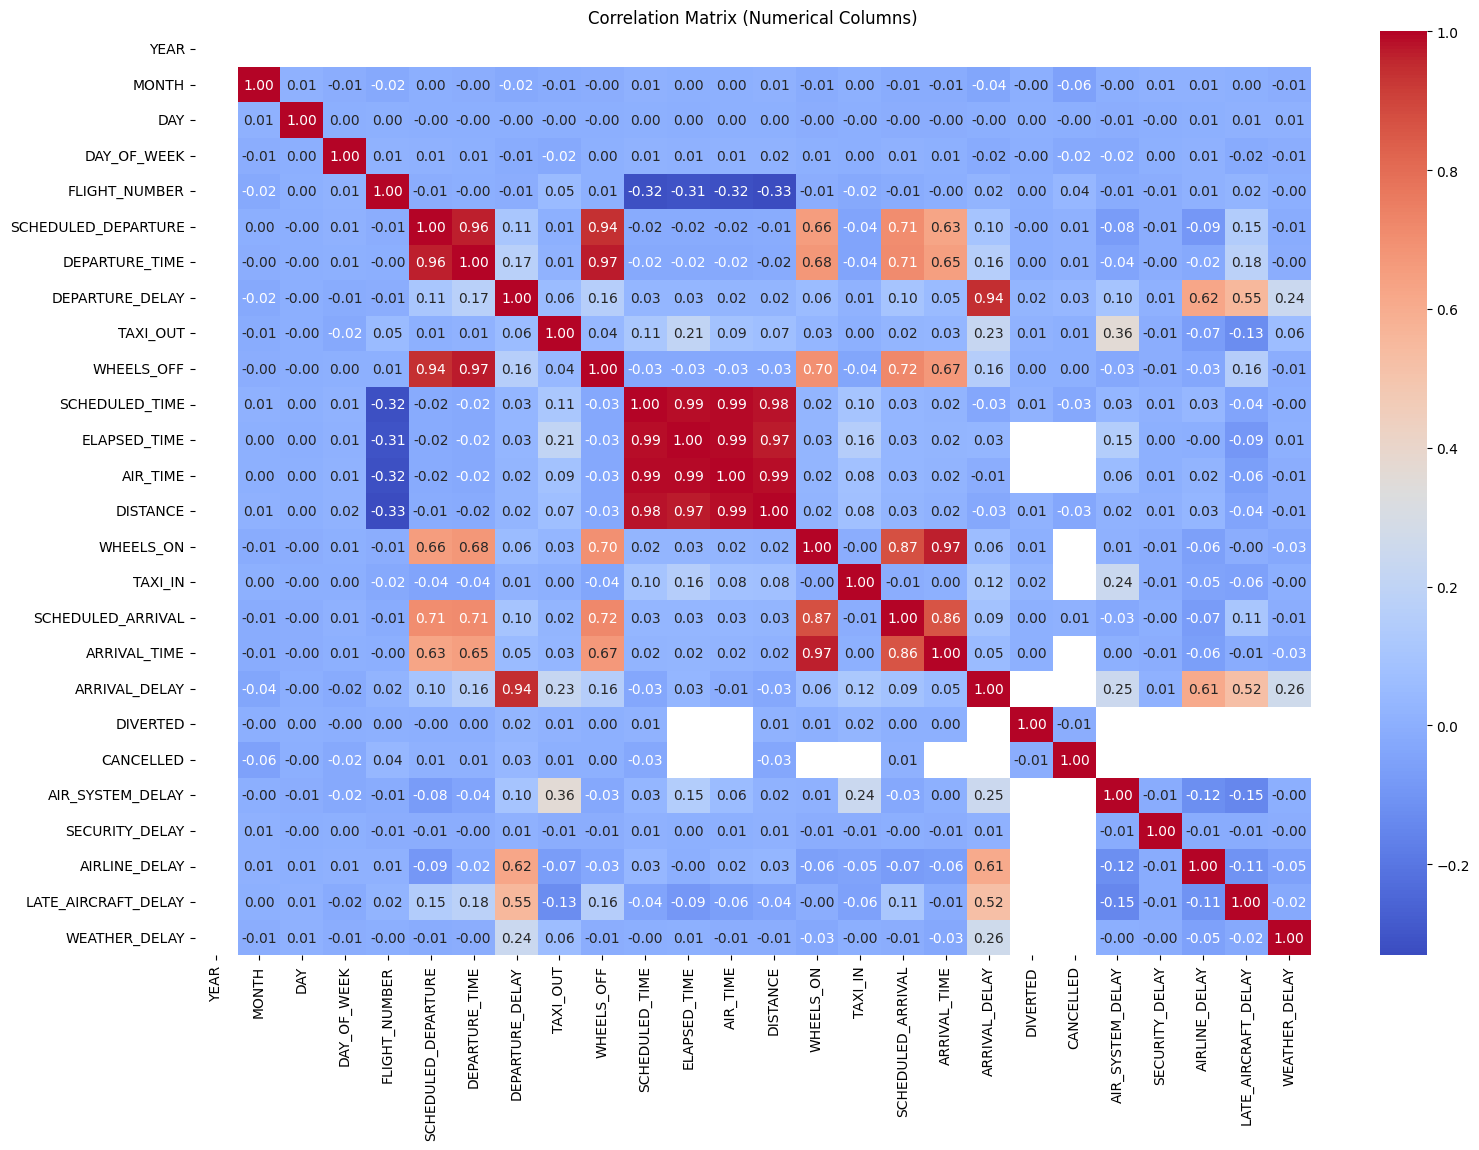

In [24]:
numerical_columns = flights.select_dtypes(include=['number'])

#The correlation matrix
correlation_matrix = numerical_columns.corr()
plt.figure(figsize=(18,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Numerical Columns)')
plt.show()

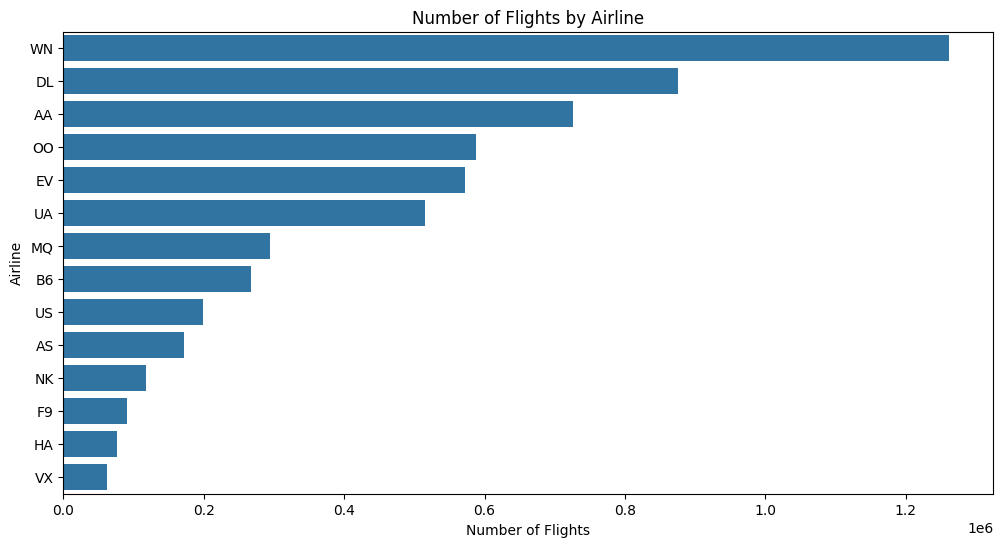

In [25]:
# Count of flights by airlines
plt.figure(figsize=(12, 6))
sns.countplot(y='AIRLINE', data=flights, order=flights['AIRLINE'].value_counts().index)
plt.title('Number of Flights by Airline')
plt.xlabel('Number of Flights')
plt.ylabel('Airline')
plt.show()